<h1>Prosjektoppgave</h1>
<h2>Av Trudy Ann Roberts</h2>

In [34]:
# Del a: lese fil og lagre kolonnene i arrays
import pandas as pd

fil = 'support_uke_24.xlsx'
data = pd.read_excel(fil)

#lagre arrays av de fire kolonnene i fila
u_dag = data['Ukedag'].values # kolonne 1 lagres i arrayet u_dag
kl_slett = data['Klokkeslett'].values
varighet = data['Varighet'].values
score = data['Tilfredshet'].values

#printer den første verdien i hver kolonne for å se at det fungerer
print("Ukedag:", u_dag[0])
print("Klokkeslett:", kl_slett[0])
print("Varighet:", varighet[0])
print("Score:", score[0])

Ukedag: Mandag
Klokkeslett: 08:04:16
Varighet: 00:07:12
Score: nan


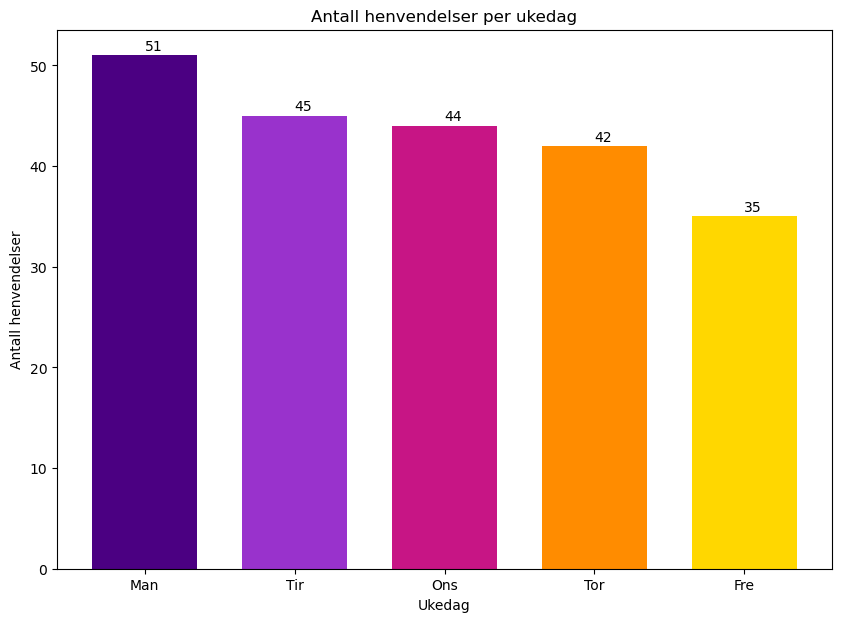

In [112]:
# Del b: Antall henvendelser for hver av ukedagene
import matplotlib.pyplot as plt

henvendelser = data["Ukedag"].value_counts() # antall ukedager
antall = henvendelser.values # fjernen kolonnen "ukedager", slik at jeg bare får tallet
ukedager = ["Man", "Tir", "Ons", "Tor", "Fre"]

plt.figure(1, figsize=(10, 7))

plt.bar(ukedager, antall, width=0.7, color=('indigo','darkorchid', 'mediumvioletred', 'darkorange', 'gold'))

# plotter eksakt antall oppå hver bar, som vist i boka
offset_y = 0.5
for k in range(0, len(ukedager)):
    plt.text(ukedager[k], antall[k]+offset_y, str(antall[k]))

plt.title("Antall henvendelser per ukedag")
plt.xlabel("Ukedag")
plt.ylabel('Antall henvendelser')
plt.show()


In [116]:
# Del c: Minste og lengste samtaletid som er loggført i uke 24

maks_tid = max(varighet)
min_tid = min(varighet)

print("Minste samtaletid i uke 24:", min_tid) 
print("Lengste samtaletid i uke 24:",maks_tid)

Minste samtaletid i uke 24: 00:00:59
Lengste samtaletid i uke 24: 00:11:28


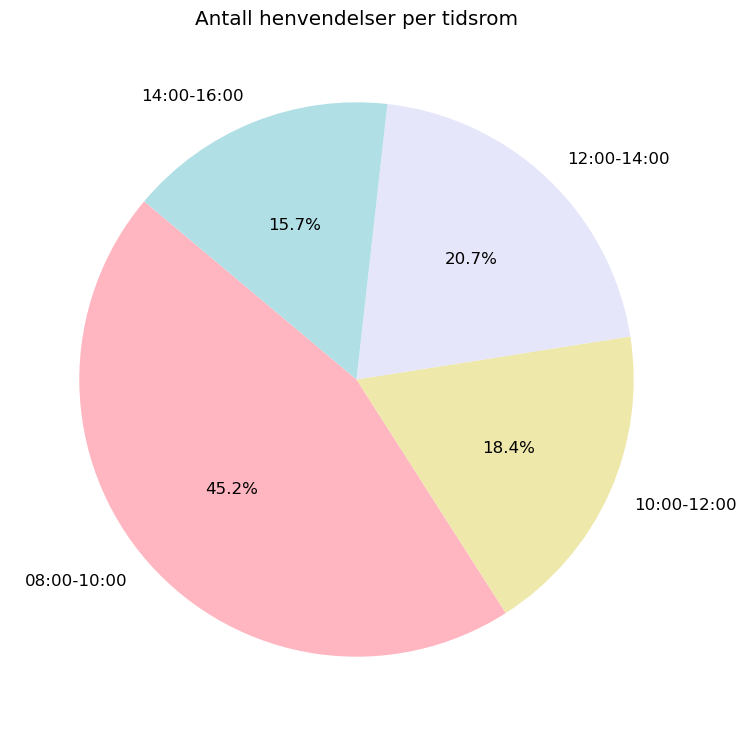

In [248]:
# Del e: antall samtaler i ulike tidsrom, visualiert i et kakediagram

# tellevariabler for hver tidsperiode
fra_08 = 0
fra_10 = 0
fra_12 = 0
fra_14 = 0

# En for-løkke som går gjennom alle tidspunktene i kolonnen varighet
for tid in kl_slett:
    kl_split = tid.split(":") # Bruker kolon som dilimeter
    time = kl_split[0] #henter ut timen fra kl_slett
    
    if ("08" <= time < "10"):
        fra_08 += 1
    elif ("10" <= time < "12"):
        fra_10 += 1
    elif ("12" <= time < "14"):
        fra_12 += 1
    elif ("14" <= time < "16"):
        fra_14 += 1

tidsrom = ["08:00-10:00", "10:00-12:00", "12:00-14:00", "14:00-16:00"]
antall = [fra_08, fra_10, fra_12, fra_14]

#kakediagram
plt.close("all")
plt.figure(1, figsize=(12, 9))
plt.rc("font", size=12)
plt.pie(antall, labels=tidsrom, autopct="%1.1f%%", startangle=140, colors=("lightpink", "palegoldenrod", "lavender", "powderblue"))

# Legge til tittel og sørge for at kakediagrammet blir sirkulært
plt.title("Antall henvendelser per tidsrom")
plt.show()



In [290]:
#Del f: supportavdelings NPS

#legge riktig tall i tilhørende kategori
negativ = score[(score >= 1) & (score <= 6)] 
noytral = score[(score >= 7) & (score <= 8)]  
positiv = score[(score >= 9) & (score <= 10)] 

#utregning av prosent
neg_prosent = len(negativ) / len(score)*100
pos_prosent = len(positiv) / len(score)*100

NPS = pos_prosent - neg_prosent

print(f"NPS på kundens tilfredshet er: {NPS:.1f}%")

    

NPS på kundens tilfredshet er: 8.3%
